In [0]:
"""
Import required libraries.

DON'T comment out these imports when submitting your final hw2.py file.
"""
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from numpy.random import randn, seed
from numpy import cov
from scipy.stats import pearsonr

In [0]:
"""
FOR COLAB USERS ONLY

Run the following code to upload and unzip the data into the Colab environment.

Please comment out *everything* in this cell (including the import) when submitting your .py file.
"""
from google.colab import files
uploaded = files.upload()

Saving cleaned - cleaned.csv to cleaned - cleaned (1).csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['cleaned - cleaned.csv']))
data = df.as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


First get my X,Ys

In [0]:
Y = df["Trip Total"].values
df_ = df.copy()
df_ = df_.drop(columns="Trip Total")
X = df_.values

Geo data

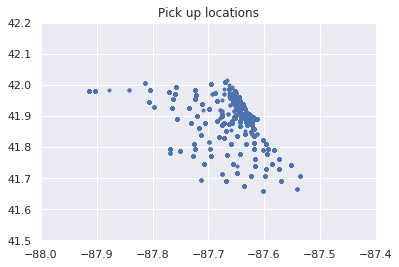

In [0]:
import matplotlib.pyplot as plt
plt.title('Pick up locations')
plt.plot(df['Pickup Centroid Longitude'].values, df['Pickup Centroid Latitude'].values,'.')
plt.ylim(41.5, 42.2)
plt.xlim(-88,-87.4)
plt.show()

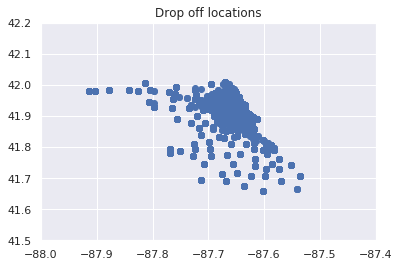

In [0]:
import matplotlib.pyplot as plt
plt.title('Drop off locations')
plt.scatter(x=df['Dropoff Centroid Longitude'], y=df['Dropoff Centroid Latitude'])
plt.ylim(41.5, 42.2)
plt.xlim(-88,-87.4)
plt.show()

Fair vs. trip distance

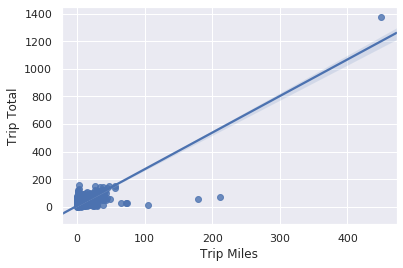

In [0]:
sns.regplot(x=pd.Series(df['Trip Miles'], name="Trip Miles"), y=pd.Series(df['Trip Total'], name="Trip Total"));

Correlations between fare v. distance:

In [0]:
X = df['Trip Miles']
Y = df['Trip Total']
pearsonr(X,Y)

(0.9045314346412533, 0.0)

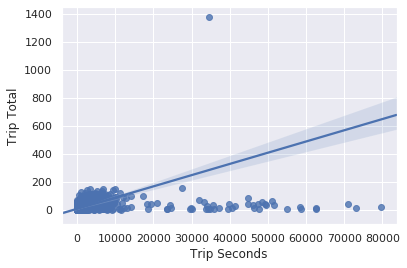

In [0]:
sns.regplot(x=pd.Series(df['Trip Seconds'], name="Trip Seconds"), y=pd.Series(df['Trip Total'], name="Trip Total"));

Correlations between fare v. time

In [0]:
X = df['Trip Seconds']
Y = df['Trip Total']
pearsonr(X,Y)

(0.6393555627015532, 0.0)

Analysis based on taxi comp

In [0]:
df = df[(df[['Trip Miles','Trip Seconds']] != 0).all(axis=1)]

In [0]:
df['Company'].values

array(['Taxi Affiliation Services', 'Star North Management LLC',
       'Taxi Affiliation Services', ..., 'City Service',
       'Medallion Leasin', 'Medallion Leasin'], dtype=object)

In [0]:
Taxi_comps = ["Taxi Affiliation Services", "Flash Cab", "Chicago Carriage Cab Corp", "Sun Taxi", "Medallion Leasin", "City Service", "Star North Management LLC"]
avg_price = []
for t in Taxi_comps:
  cur_df = df[df['Company']==t]
  avg_price.append(np.mean(cur_df["Trip Total"].values / cur_df["Trip Miles"].values/cur_df["Trip Seconds"].values))

No handles with labels found to put in legend.


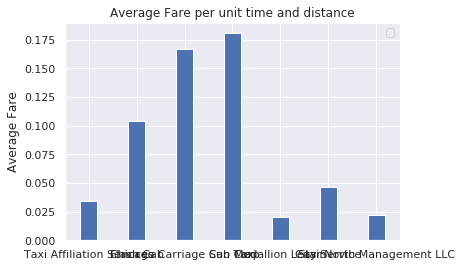

In [0]:
x = np.arange(len(Taxi_comps))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, avg_price, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Fare')
ax.set_title('Average Fare per unit time and distance')
ax.set_xticks(x)
ax.set_xticklabels(Taxi_comps)
ax.legend()